<a href="https://colab.research.google.com/github/N-avi-N/TF_projects/blob/master/Tensorflow_website_image_classification_eg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q tf-nightly
# https://www.tensorflow.org/tutorials/images/classification?authuser=4

     |████████████████████████████████| 390.2MB 36kB/s 
     |████████████████████████████████| 10.2MB 47.4MB/s 
     |████████████████████████████████| 460kB 37.3MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import flower dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

228818944/228813984 [==============================] - 2s 0us/step
3670


In [ ]:
# see sample images
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0])).show()
PIL.Image.open(str(roses[1])).show()

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1])).show()

In [ ]:
# define batch size, image width, image height
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# define training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# define validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# get class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


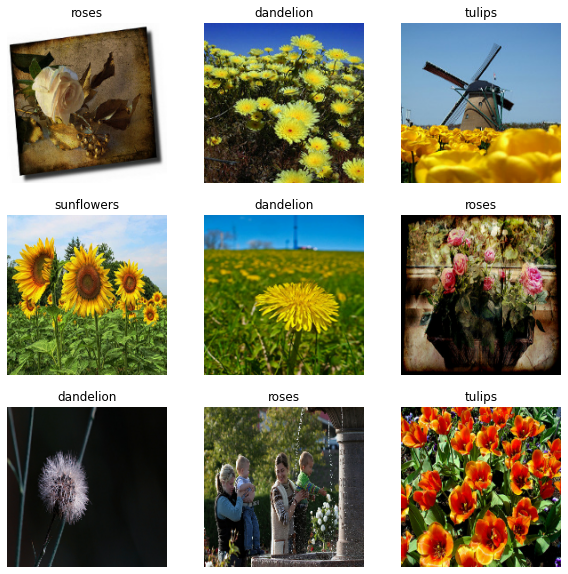

In [ ]:
# visualize data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
# define CACHE and Prefetch to save loading time and prevent bottlenecks due to data size
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Normalize the data
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:

# define model
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='acc')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
# train model
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)


Epoch 1/10
92/92 [==============================] - 3s 38ms/step - loss: 1.3225 - acc: 0.4421 - val_loss: 1.0916 - val_acc: 0.5381
Epoch 2/10
92/92 [==============================] - 2s 20ms/step - loss: 0.9914 - acc: 0.6100 - val_loss: 1.0180 - val_acc: 0.5817
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.7570 - acc: 0.7149 - val_loss: 1.0159 - val_acc: 0.5981
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.5180 - acc: 0.8168 - val_loss: 1.0237 - val_acc: 0.6376
Epoch 5/10
92/92 [==============================] - 2s 20ms/step - loss: 0.3143 - acc: 0.8924 - val_loss: 1.1094 - val_acc: 0.6349
Epoch 6/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1541 - acc: 0.9510 - val_loss: 1.6551 - val_acc: 0.5777
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0841 - acc: 0.9813 - val_loss: 1.6534 - val_acc: 0.6281
Epoch 8/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0283 - a

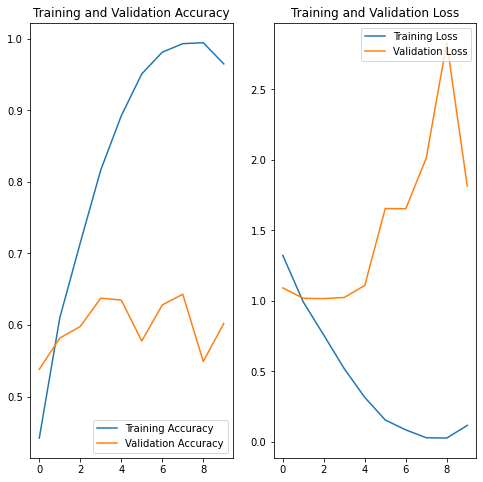

In [ ]:

# visualize results
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# data augmentation
data_augmentation = keras.Sequential([
                      layers.experimental.preprocessing.RandomFlip('horizontal', input_shape =(img_height, img_width, 3)),
                      layers.experimental.preprocessing.RandomRotation(0.1),
                      layers.experimental.preprocessing.RandomZoom(0.1),
])

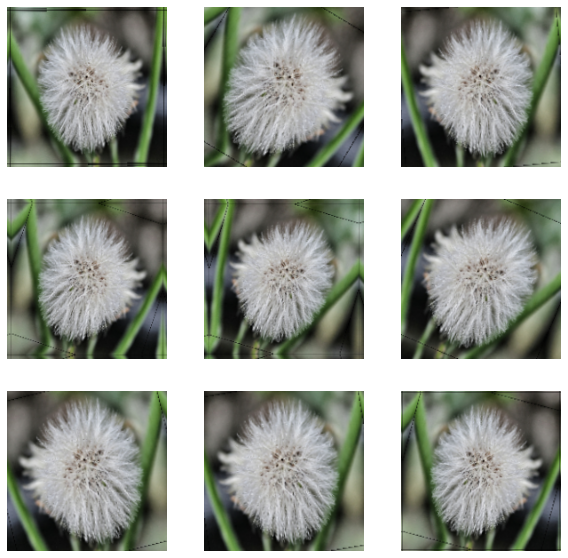

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
# train model
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
92/92 [==============================] - 3s 27ms/step - loss: 0.5774 - accuracy: 0.7810 - val_loss: 0.7473 - val_accuracy: 0.7112
Epoch 2/15
92/92 [==============================] - 2s 27ms/step - loss: 0.5645 - accuracy: 0.7844 - val_loss: 0.7451 - val_accuracy: 0.7193
Epoch 3/15
92/92 [==============================] - 2s 26ms/step - loss: 0.5702 - accuracy: 0.7803 - val_loss: 0.7875 - val_accuracy: 0.7044
Epoch 4/15
92/92 [==============================] - 2s 26ms/step - loss: 0.5299 - accuracy: 0.8011 - val_loss: 0.7857 - val_accuracy: 0.7071
Epoch 5/15
92/92 [==============================] - 2s 27ms/step - loss: 0.5004 - accuracy: 0.8123 - val_loss: 0.7876 - val_accuracy: 0.7221
Epoch 6/15
92/92 [==============================] - 2s 27ms/step - loss: 0.4754 - accuracy: 0.8181 - val_loss: 0.7944 - val_accuracy: 0.6907
Epoch 7/15
92/92 [==============================] - 2s 27ms/step - loss: 0.4804 - accuracy: 0.8157 - val_loss: 0.7468 - val_accuracy: 0.7371
Epoch 8/15
92

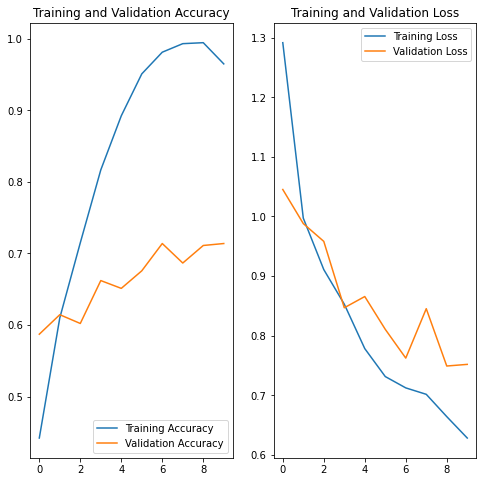

In [ ]:
# vizualize training results
cc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# test on new data
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


122880/117948 [===============================] - 0s 0us/step
This image most likely belongs to sunflowers with a 99.83 percent confidence.
